In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 从Trail表中读取length数据
query = "SELECT length FROM Trail"
trail = pd.read_sql_query(query, conn)

# 关闭数据库连接
conn.close()

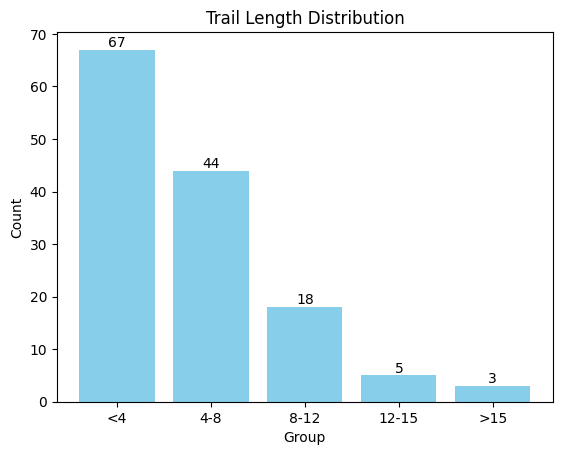

In [14]:
# 定义分组边界
bins = [0, 4, 8, 12, 15, float('inf')]
labels = ['<4', '4-8', '8-12', '12-15', '>15']

# 将数据分组
trail['group'] = pd.cut(trail['length'], bins=bins, labels=labels, right=False)

# 计算每个分组的计数
group_counts = trail['group'].value_counts().sort_index()

# 创建柱状图，并设置颜色
plt.bar(group_counts.index, group_counts.values, color='skyblue')

# 添加数值标签
for i, count in enumerate(group_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 添加标题和标签
plt.title('Trail Length Distribution')
plt.xlabel('Group')
plt.ylabel('Count')

# 显示图形
plt.show()

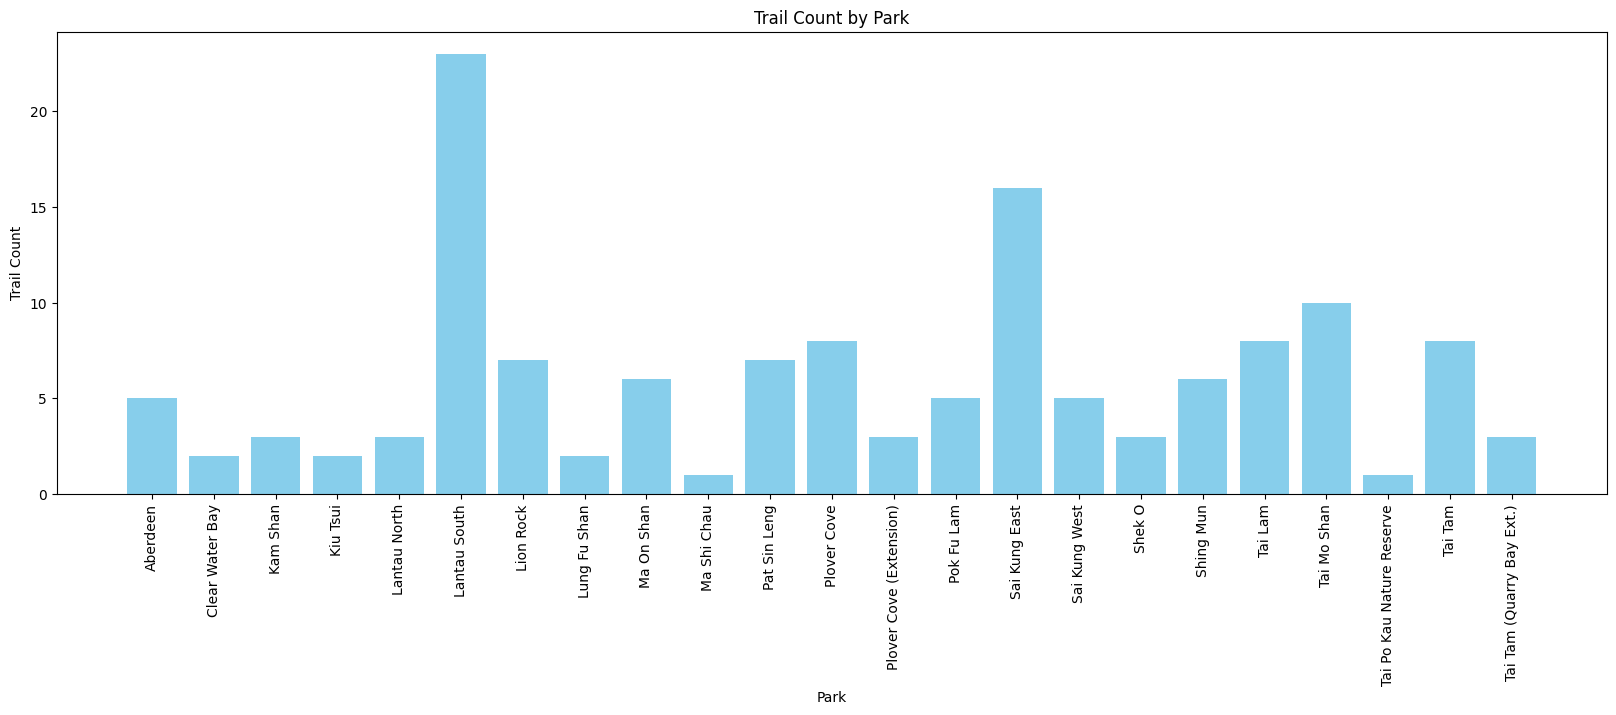

In [22]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 从Trail表和Park表中读取数据，并进行联结和分组计数
query1 = '''
SELECT Park.park_name, COUNT(Trail.trail_name) AS trail_count
FROM Trail
JOIN Park ON Trail.park_id = Park.park_id
GROUP BY Park.park_name
'''

trail_by_parks = pd.read_sql_query(query1, conn)

# 关闭数据库连接
conn.close()

# 创建更大的图形窗口
plt.figure(figsize=(20, 6))

# 创建柱状图
plt.bar(trail_by_parks['park_name'], trail_by_parks['trail_count'], color='skyblue')

# 添加标题和标签
plt.title('Trail Count by Park')
plt.xlabel('Park')
plt.ylabel('Trail Count')

# 旋转x轴标签，以提高可读性（可选）
plt.xticks(rotation=90)

# 显示图形
plt.show()

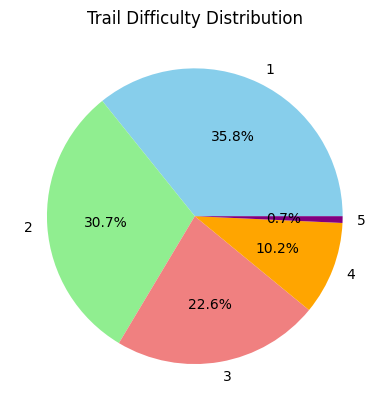

In [24]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 从Trail表中读取难度数据并进行分组计数
query3 = '''
SELECT difficulty, COUNT(*) AS count
FROM Trail
GROUP BY difficulty
'''

trail_difficulty = pd.read_sql_query(query3, conn)

# 关闭数据库连接
conn.close()

# 定义颜色列表
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple']

# 创建饼图
plt.pie(trail_difficulty['count'], labels=trail_difficulty['difficulty'], autopct='%1.1f%%', colors=colors)

# 添加标题
plt.title('Trail Difficulty Distribution')

# 显示图形
plt.show()

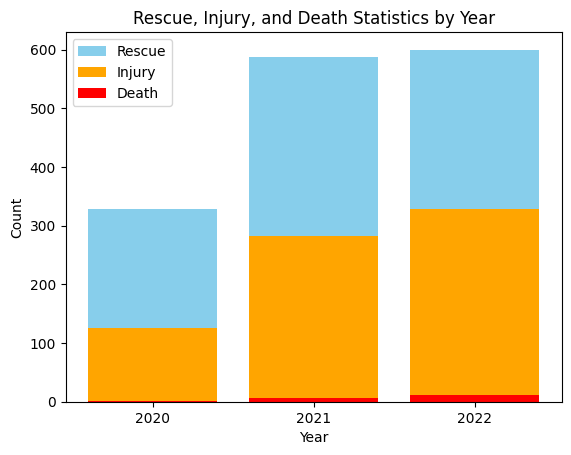

In [31]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 从Rescue表中读取救援事故、受伤和死亡人数，并根据年份进行分组计数
query4 = '''
SELECT year,
       SUM(rescue_count) AS total_rescue_count,
       SUM(injury_count) AS total_injury_count,
       SUM(death_count) AS total_death_count
FROM Rescue
GROUP BY year
'''

rescue_stats = pd.read_sql_query(query4, conn)

# 关闭数据库连接
conn.close()

# 创建条形图
plt.bar(rescue_stats['year'], rescue_stats['total_rescue_count'], label='Rescue', color='skyblue')
plt.bar(rescue_stats['year'], rescue_stats['total_injury_count'], label='Injury', color='orange')
plt.bar(rescue_stats['year'], rescue_stats['total_death_count'], label='Death', color='red')

# 添加标题和标签
plt.title('Rescue, Injury, and Death Statistics by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# 添加图例
plt.legend()

# 调整X轴刻度标签
plt.xticks(rescue_stats['year'])

# 显示图形
plt.show()

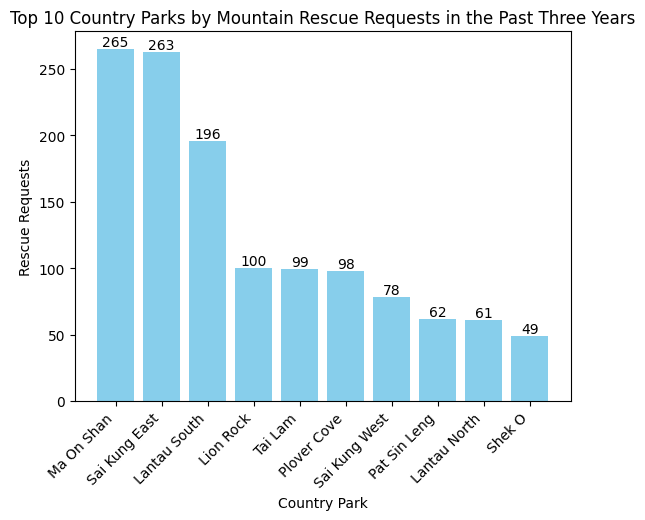

In [36]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 查询公园的山地救援请求数量
query5 = '''
SELECT p.park_name, SUM(r.rescue_count) AS total_rescue_count
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_rescue_count DESC
LIMIT 10
'''

park_rescue_stats = pd.read_sql_query(query5, conn)

# 关闭数据库连接
conn.close()

# 创建条形图
plt.bar(park_rescue_stats['park_name'], park_rescue_stats['total_rescue_count'], color='skyblue')

# 添加数值标签
for i, count in enumerate(park_rescue_stats['total_rescue_count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

# 添加标题和标签
plt.title('Top 10 Country Parks by Mountain Rescue Requests in the Past Three Years')
plt.xlabel('Country Park')
plt.ylabel('Rescue Requests')

# 调整X轴标签的显示
plt.xticks(rotation=45, ha='right')

# 显示图形
plt.show()

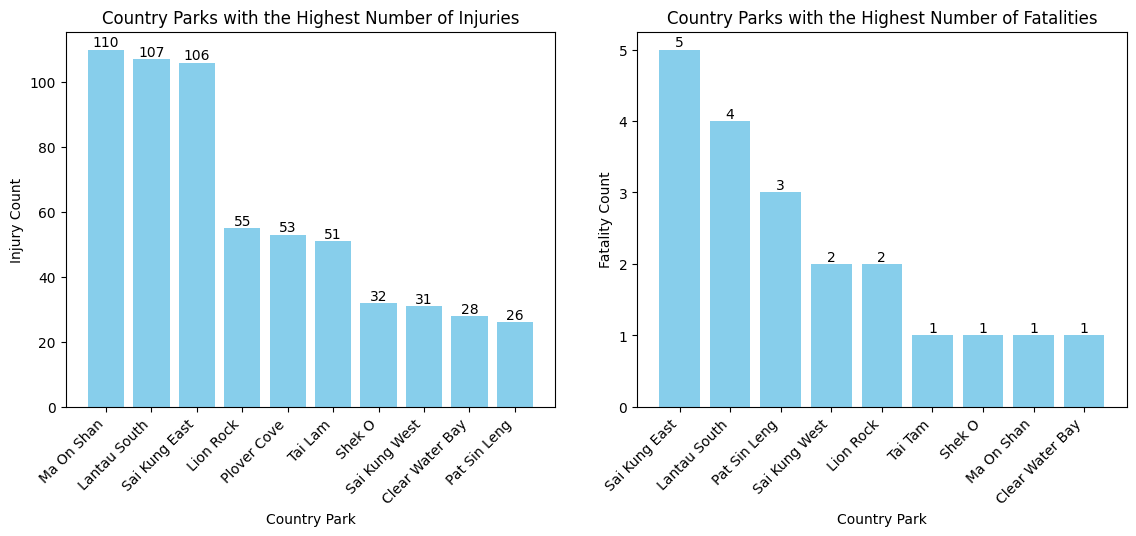

In [42]:
# 连接到数据库
conn = sqlite3.connect('data/hiking.db')

# 查询受伤人数最多的国家公园
injury_query = '''
SELECT p.park_name, SUM(r.injury_count) AS total_injuries
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_injuries DESC
LIMIT 10
'''

injury_stats = pd.read_sql_query(injury_query, conn)

# 查询死亡人数最多的国家公园
fatality_query = '''
SELECT p.park_name, SUM(r.death_count) AS total_fatalities
FROM Park AS p
JOIN Rescue AS r ON p.park_id = r.park_id
GROUP BY p.park_name
ORDER BY total_fatalities DESC
LIMIT 9
'''

fatality_stats = pd.read_sql_query(fatality_query, conn)

# 关闭数据库连接
conn.close()

# 调整图形大小
plt.figure(figsize=(12, 6))

# 创建受伤人数最多的国家公园表
plt.subplot(1, 2, 1)
bar1 = plt.bar(injury_stats['park_name'], injury_stats['total_injuries'], color='skyblue')
plt.title('Country Parks with the Highest Number of Injuries')
plt.xlabel('Country Park')
plt.ylabel('Injury Count')
plt.xticks(rotation=45, ha='right')

# 在每个条形上方显示数值标签
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# 创建死亡人数最多的国家公园表
plt.subplot(1, 2, 2)
bar2 = plt.bar(fatality_stats['park_name'], fatality_stats['total_fatalities'], color='skyblue')
plt.title('Country Parks with the Highest Number of Fatalities')
plt.xlabel('Country Park')
plt.ylabel('Fatality Count')
plt.xticks(rotation=45, ha='right')

# 在每个条形上方显示数值标签
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# 调整子图之间的间距
plt.tight_layout(pad=3)

# 显示图形
plt.show()